In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
sys.path.append("../HelperFunctions")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import cv2
from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, plot_some
from csbdeep.data import RawData, create_patches_reduced_target
from selectrawdata import SelectRawData

import time


Using TensorFlow backend.


In [2]:

raw_data = SelectRawData.Shuffle_from_folder(
    basepath    = '/run/user/1000/gvfs/smb-share:server=isiserver.curie.net,share=u934/equipe_bellaiche/l_sancere/Training_Data_Sets/Training_CARE_projection/SpinwideFRAP4_Training_CARE_40x_bin1_3Gfp/',
    source_dirs = ['Low','Restored'],
    target_dir  = 'GT',
    axes        = 'ZYX',
    pattern = '*'
    
)

In [6]:

X, Y, XY_axes = create_patches_reduced_target (
    raw_data            = raw_data,
    patch_size          = (None,64,64), #for bin1 it is None 64 64 and for bin2 it is None 32 32
    n_patches_per_image = 24, #32 for bin1 
    target_axes         = 'YX',
    reduction_axes      = 'Z',
    save_file           = '/run/media/sancere/DATA/Lucas_NextonCreated_npz/SpinwideFRAP4_Training_CARE_40x_bin1_3Gfp.npz',
)

 5238 raw images x    1 transformations   =  5238 images
 5238 images     x   24 patches per image = 125712 patches in total
Input data:
/run/user/1000/gvfs/smb-share:server=isiserver.curie.net,share=u934/equipe_bellaiche/l_sancere/Training_Data_Sets/Training_CARE_projection/SpinwideFRAP4_Training_CARE_40x_bin1_3Gfp/: target='GT', sources=['Low', 'Restored'], axes='ZYX', pattern='*'
Transformations:
1 x Broadcast target image to the shape of source
Patch size:
25 x 64 x 64



100%|██████████| 5238/5238 [18:28:08<00:00, 12.69s/it]


Saving data to /run/media/sancere/DATA/Lucas_NextonCreated_npz/SpinwideFRAP4_Training_CARE_40x_bin1_3Gfp.npz.


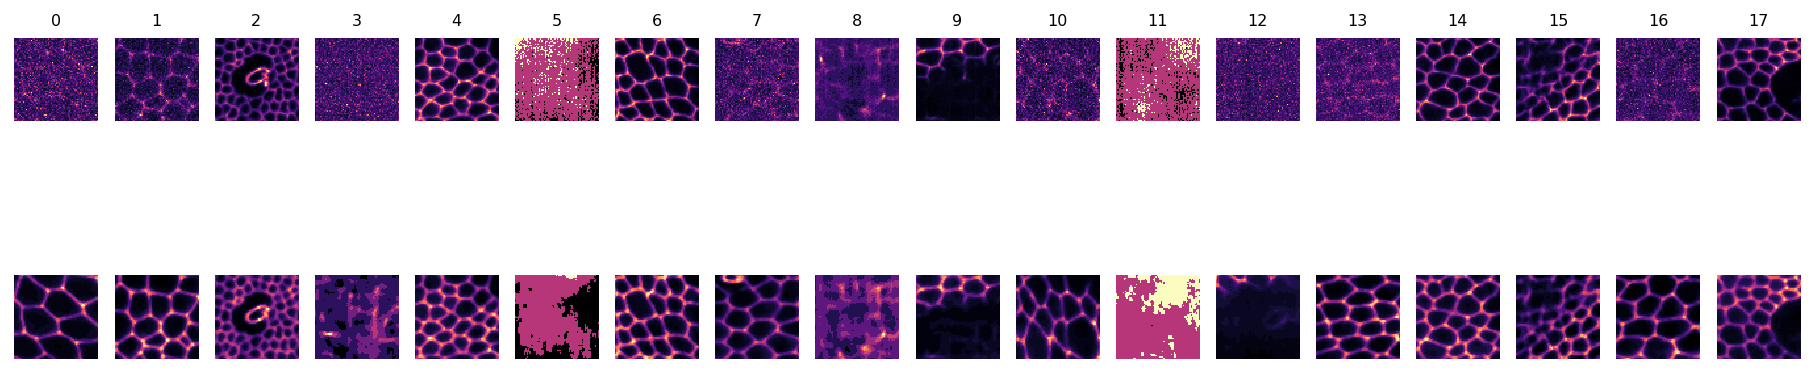

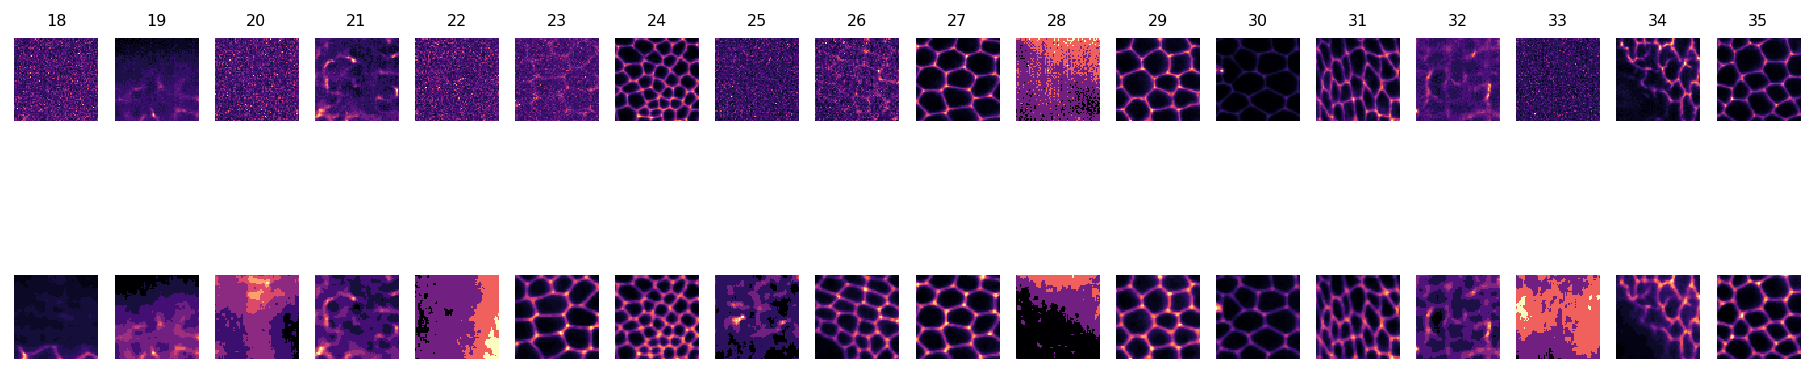

In [7]:
for i in range(2):
    plt.figure(figsize=(16,4))
    sl = slice(18*i, 18*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
None;

In [8]:
from csbdeep.utils import Path

TriggerName = '/home/sancere/NextonDisk_1/TimeTrigger/TTisitcreated'
Path(TriggerName).mkdir(exist_ok = True)